In [1]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

tqdm.pandas()
%matplotlib inline

# Import Data


In [2]:
with zipfile.ZipFile("data/audio-features-and-lyrics-of-spotify-songs.zip") as z:
    with z.open("spotify_songs.csv") as f:
        df = pd.read_csv(f)

In [3]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [4]:
df.drop(columns=["track_album_id", "playlist_id"]).head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,Trip,2001-01-01,Pinoy Classic Rock,rock,classic rock,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


# Details


In [5]:
print("Data Shape    :", df.shape)
print("Song Count    :", df["track_id"].nunique())
print("Artist Count  :", df["track_artist"].nunique())
print("Genre Count   :", df["playlist_genre"].nunique())

Data Shape    : (18454, 25)
Song Count    : 18454
Artist Count  : 6031
Genre Count   : 6


## Word Count Analysis


In [6]:
df["word_count"] = df["lyrics"].str.split().str.len()

In [7]:
df.word_count.describe()

count    18194.000000
mean       426.233868
std        339.272181
min          1.000000
25%        235.000000
50%        341.000000
75%        509.750000
max       5509.000000
Name: word_count, dtype: float64

/home/mephisto/.anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Density Plot of Word Count')

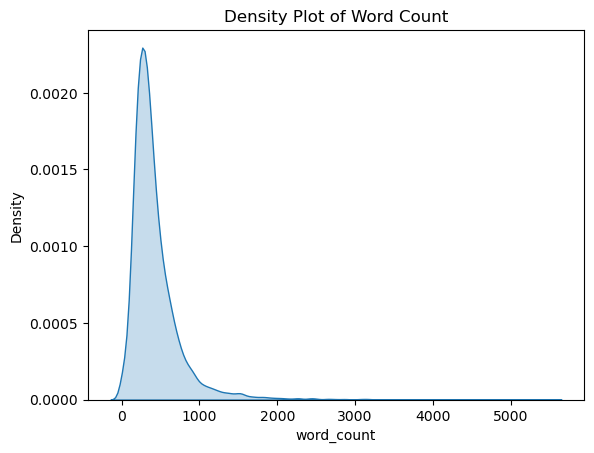

In [8]:
# Density plot with shade
sns.kdeplot(df["word_count"], fill=True)
plt.title("Density Plot of Word Count")

/home/mephisto/.anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Density Plot of Word Count')

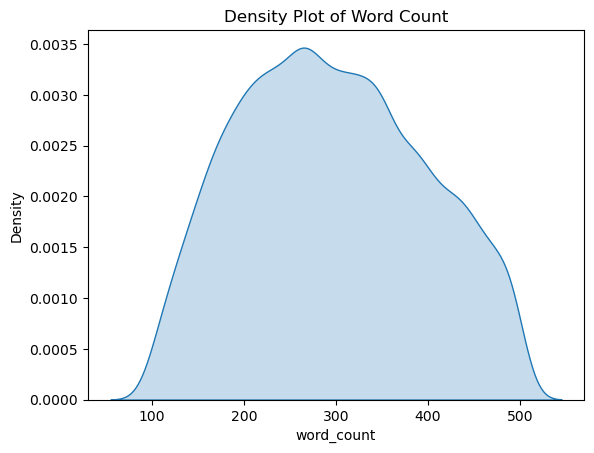

In [9]:
# Limitation of lyrics (word count)

MAX_WORD = 500
MIN_WORD = 100

df_clean = df[df["word_count"] <= MAX_WORD]
df_clean = df_clean[df_clean["word_count"] >= MIN_WORD]

sns.kdeplot(df_clean["word_count"], fill=True)
plt.title("Density Plot of Word Count")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'rock'),
  Text(1, 0, 'r&b'),
  Text(2, 0, 'pop'),
  Text(3, 0, 'edm'),
  Text(4, 0, 'latin'),
  Text(5, 0, 'rap')])

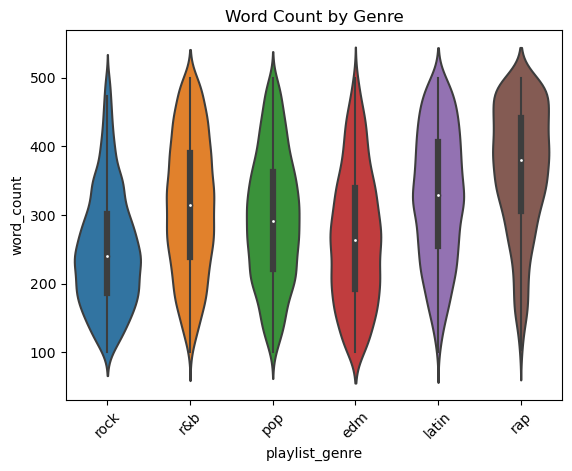

In [10]:
sns.violinplot(data=df_clean, x="playlist_genre", y="word_count")
plt.title("Word Count by Genre")
plt.xticks(rotation=45)

In [11]:
df_clean["word_count"].describe()

count    12898.000000
mean       296.004574
std         99.795670
min        100.000000
25%        217.000000
50%        291.000000
75%        372.750000
max        500.000000
Name: word_count, dtype: float64

# Genre Analysis and Cleaning


## Remove Genres

Remove genres that were underrepresented in the dataset.


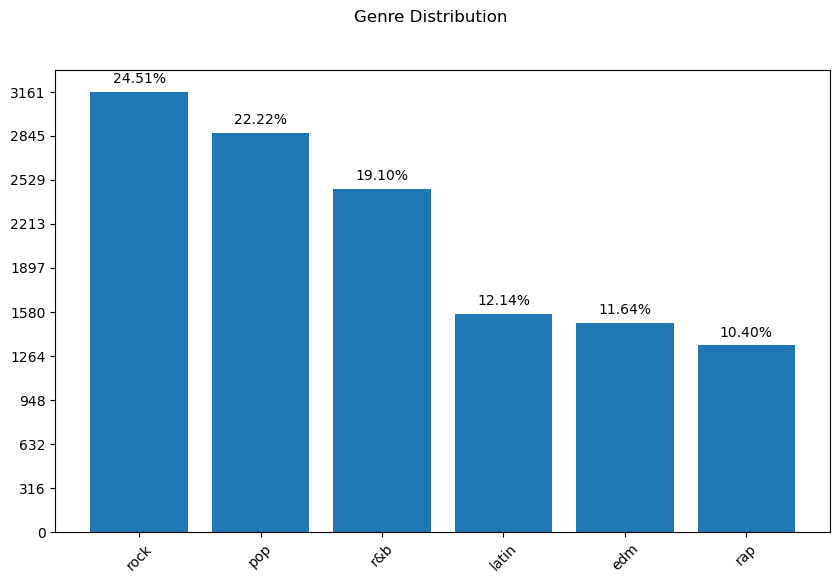

In [12]:
def plot_genre(df):
    counts = df["playlist_genre"].value_counts()
    x = counts.keys()
    max_count = df["playlist_genre"].value_counts().max()
    proportions = counts / counts.sum()  # Normalize

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, counts)
    for index, _ in enumerate(counts):
        ax.text(
            index,
            counts.iloc[index] + max_count / 50,
            f"{proportions.iloc[index]:.2%}",
            ha="center",
        )
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0, max_count + max_count / 10, max_count / 10))
    fig.suptitle("Genre Distribution")


plot_genre(df_clean)

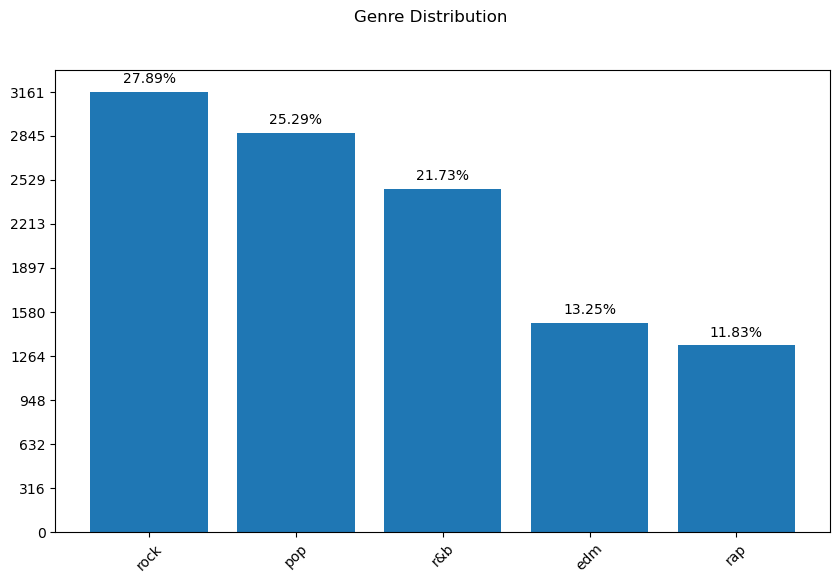

In [13]:
# Don't include latin genre
remove_genres = ["latin"]

df_new = df_clean.copy()
for genre in remove_genres:
    df_new = df_new[df_new["playlist_genre"] != genre]
df_clean = df_new
del df_new
plot_genre(df_clean)

In [14]:
genre_mapping = {
    value: key for key, value in enumerate(set(df_clean["playlist_genre"]))
}
genre_mapping

{'edm': 0, 'r&b': 1, 'pop': 2, 'rock': 3, 'rap': 4}

In [15]:
df_clean["playlist_genre_id"] = df_clean["playlist_genre"].replace(genre_mapping)

In [16]:
df_clean.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language,word_count,playlist_genre_id
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl,135.0,3
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en,111.0,3
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en,420.0,1
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en,341.0,1
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en,351.0,2


## Split the data to Train, Validation and Test


In [17]:
from sklearn.model_selection import train_test_split

# Genre Columns
genre_columns = [
    "playlist_genre",
    "playlist_genre_id",
]

# Lyrics Column
lyrics_column = [
    "lyrics",
]

# Audio Features Columns
audio_feature_columns = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "mode",
    "speechiness",
    "tempo",
    "valence",
]

# Other Columns
other_columns = [
    "duration_ms",
    "track_popularity",
]

# Feature Columns (Combine all)
feature_columns = genre_columns + lyrics_column + audio_feature_columns + other_columns

df_train, df_test = train_test_split(
    df_clean[feature_columns],
    test_size=0.1,
    random_state=12123,
)

df_train, df_val = train_test_split(df_train, test_size=0.1, random_state=12123)

In [18]:
print("Train Shape:", df_train.shape)
print("Validation Shape:", df_val.shape)
print("Test Shape:", df_test.shape)

Train Shape: (9178, 16)
Validation Shape: (1020, 16)
Test Shape: (1134, 16)


In [19]:
df_train.head()

,playlist_genre,playlist_genre_id,lyrics,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration_ms,track_popularity
7278,rap,4,"Ey, Capital Bra, ah Hijacker, come on and Bra ...",0.103,0.762,0.583,0.0000,0,0.0818,-6.234,0,0.2040,133.033,0.179,223800,51
1350,rock,3,NA In the shuffling madness Of the locomotive ...,0.417,0.680,0.530,0.0110,11,0.0559,-13.105,0,0.0889,124.551,0.352,266013,60
13641,r&b,1,Thinking ahead of time Why don't you spend the...,0.849,0.700,0.414,0.0606,0,0.1070,-10.864,1,0.0373,60.479,0.444,406467,59
18061,r&b,1,Told you not to worry But maybe that's a lie H...,0.724,0.855,0.423,0.4690,5,0.0896,-15.044,0,0.0585,120.020,0.572,156371,81
12763,r&b,1,I would like to get to know if I could be The ...,0.330,0.893,0.433,0.0000,11,0.3950,-5.880,0,0.3960,86.010,0.675,256667,9


## Balance the train data

The train data is imbalanced. We will balance the data by oversampling the minority classes.


In [20]:
lyric_limit = min(
    df_train.groupby("playlist_genre_id")["lyrics"].count()
)  # find the minimum count of lyrics in a genre
genres = df_train["playlist_genre_id"].unique()
balanced_df_train = pd.DataFrame()

print(f"Lyrics limit per Genre: {lyric_limit}")

for genre in genres:
    balanced_df_train = pd.concat(
        [
            balanced_df_train,
            df_train[df_train["playlist_genre_id"] == genre].sample(
                lyric_limit, random_state=12123
            ),
        ]
    )

Lyrics limit per Genre: 1079


Train data shape: (5395, 16)


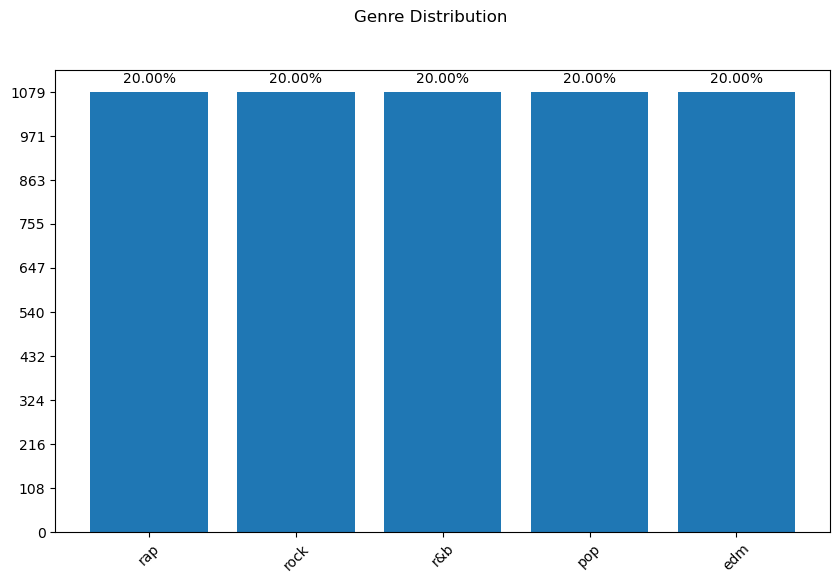

In [21]:
df_train = balanced_df_train
del balanced_df_train

plot_genre(df_train)
print(f"Train data shape: {df_train.shape}")

## Save the data


In [24]:
if not df_train.isnull().values.any():
    df_train.to_csv("./data/train_unclean.csv.zip", compression="zip")
    df_val.to_csv("./data/val_unclean.csv.zip", compression="zip")
    df_test.to_csv("./data/test_unclean.csv.zip", compression="zip")
    print("Data saved successfully")

Data saved successfully
